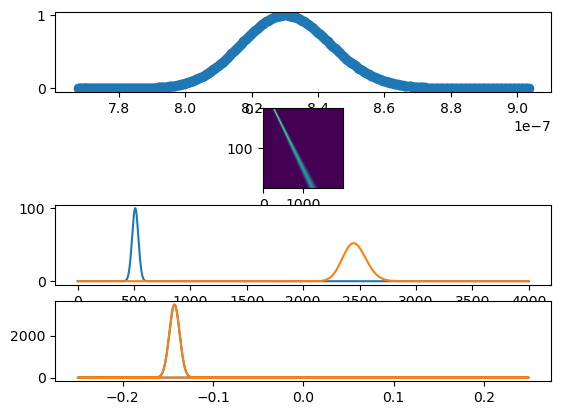

: 

In [15]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import constants as c 
n = 1.452
dndl= -.015e6 
d2ndl2= .03e12
d3ndl3=-.175e18
kc = 12048e2
dk = 195.9645e2 
fc = .357
df = .00574
Nks = 400

ks = np.linspace(kc-5*dk,kc+5*dk,Nks)
fs = np.linspace(fc-5*df,fc+5*df,Nks)
cks =np.exp(-1/2*((ks-kc)/dk)**2)
fig,axs = plt.subplots(4)
wl = 1/ks  
n =  dndl*wl+d2ndl2*wl**2+d3ndl3*wl**3 
axs[0].scatter(1/ks,cks)
Nt = 2000
Nx = 200
x = np.linspace(0,2e-2,Nx)
t = np.linspace(0,4000,Nt)
tt,xx = np.meshgrid(t,x)
kn = ks*1.452 
E = np.zeros(tt.shape,dtype='complex128')
for i,k in enumerate(ks): 
    E += cks[i]*np.exp(1.0j*(np.pi*2*fs[i]*(tt-500)-n[i]*k*xx))
axs[1].imshow(np.abs(E),aspect=10)
axs[2].plot(t,np.abs(E[1,:]))
axs[2].plot(t,np.abs(E[-1,:]))
axs[3].plot(np.fft.fftfreq(Nt,t[1]-t[0]),np.abs(np.fft.fft(E[1,:])))
axs[3].plot(np.fft.fftfreq(Nt,t[1]-t[0]),np.abs(np.fft.fft(E[-1,:])))

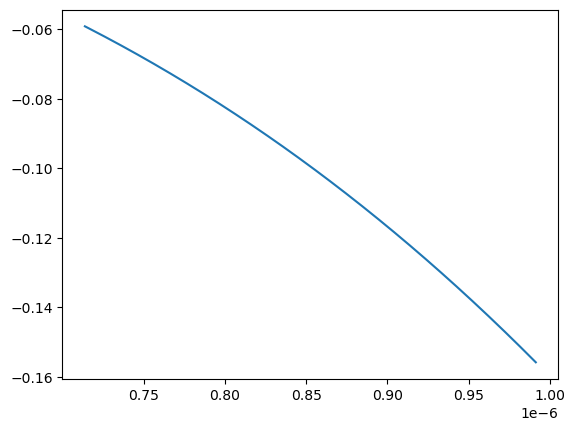

In [7]:
wl = 1/ks  
n =  dndl*wl+d2ndl2*wl**2+d3ndl3*wl**3 
plt.plot(wl,n)

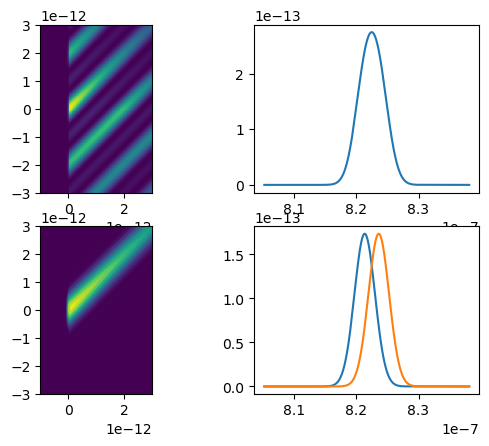

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import constants as c
tmin =-1.0e-12
tmax = 3e-12
Nt = 81
taumin = -3e-12
taumax = 3e-12
Ntau = 121

t = np.linspace(tmin,tmax,Nt)
tau = np.linspace(taumin,taumax,Ntau)
T,TAU = np.meshgrid(t,tau)
tau13 = 0e-12
def toyP(t,tau,tau13,w,g):
    return np.exp(-g*np.abs(tau+tau13))*np.exp(-g*t)*np.heaviside(t,.5)*np.exp(1j*w*t)*np.exp(1j*w*(-tau+tau13))
wa0= np.pi*.365e15 
wb0= np.pi*.364e15
wc0=np.pi*.363e15
t2a = 10.0e-12
t2b = 10.0e-12 
ga0 =  1/t2a
gb0 =  1/t2b
fig,ax = plt.subplots(2,2)
ax[0,0].imshow(np.flipud((np.abs(toyP(T,TAU,tau13,wc0,ga0)+toyP(T,TAU,tau13,wa0,ga0)+toyP(T,TAU,tau13,wb0,gb0))**2)),extent=(tmin,tmax,taumin,taumax))
FWHM = 5.37e12
Dw = FWHM/2.335
N = 1000
wa = np.linspace(wa0-10*Dw,wa0+10*Dw,N)
wb = np.linspace(wa0-10*Dw,wa0+10*Dw,N)

def g(x,x0,sig):
    return 1/(sig*np.sqrt(np.pi*2))*np.exp(-(x-x0)**2/(2*sig**2))
ga = g(wa,wa0,Dw)
gb = g(wb,wb0,Dw)
ax[0,1].plot(c.c*np.pi/wa,ga+g(wa,wb0,Dw))

ax[1,1].plot(c.c*np.pi/wa,ga)

ax[1,1].plot(c.c*np.pi/wb,gb)  
P = 0
dwa =wa[1]-wa[0]
dwb =wb[1]-wb[0]
for i in range(N):
    P = P+dwa*g(wa[i],wa0,Dw)*toyP(T,TAU,tau13,wa[i],ga0)+dwb*g(wb[i],wb0,Dw)*toyP(T,TAU,tau13,wb[i],gb0)

ax[1,0].contour(T,TAU,np.abs(P))
ax[1,0].imshow(np.flipud(np.abs(P)),extent=(tmin,tmax,taumin,taumax))

In [42]:
print(wa0,np.max(wa),np.min(wa))

1130973355292325.5 1119744233236651.0 1119744233236651.0


In [23]:
np.exp(-ga*np.abs(TAU))

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [25]:
ga*TAU

array([[-3.00000000e-24, -3.00000000e-24, -3.00000000e-24, ...,
        -3.00000000e-24, -3.00000000e-24, -3.00000000e-24],
       [-2.93939394e-24, -2.93939394e-24, -2.93939394e-24, ...,
        -2.93939394e-24, -2.93939394e-24, -2.93939394e-24],
       [-2.87878788e-24, -2.87878788e-24, -2.87878788e-24, ...,
        -2.87878788e-24, -2.87878788e-24, -2.87878788e-24],
       ...,
       [ 2.87878788e-24,  2.87878788e-24,  2.87878788e-24, ...,
         2.87878788e-24,  2.87878788e-24,  2.87878788e-24],
       [ 2.93939394e-24,  2.93939394e-24,  2.93939394e-24, ...,
         2.93939394e-24,  2.93939394e-24,  2.93939394e-24],
       [ 3.00000000e-24,  3.00000000e-24,  3.00000000e-24, ...,
         3.00000000e-24,  3.00000000e-24,  3.00000000e-24]])

In [1]:
pip install termplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 1.3 MB/s eta 0:00:02
   - -------------------------------------- 0.1/1.8 MB 1.1 MB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.8 MB 2.0 MB/s eta 0:00:01
   ---------- ----------------------------- 0.5/1.8 MB 3.2 MB/s eta 0:00:01
   ------------ --------------------------- 0.6/1.8 MB 3.0 MB/s eta 0:00:01
   ----------------- ---------------------- 0.8/1.8 MB 3.6 MB/s eta 0:00:01
   ------------------------ --------------- 1.1/1.8 MB 4.0 MB/s eta 0:00:01
   ------------------------------ --------- 1.4/1.8 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------  1.8/1.8 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 5.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
     

In [3]:
pip install plotext


   ---------------------------------------- 0.0/60.2 kB ? eta -:--:--
   ---------------------------------------- 60.2/60.2 kB 1.6 MB/s eta 0:00:00


In [4]:
import plotext as plt
y = plt.sin() # sinusoidal signal 
plt.scatter(y)
plt.title("Scatter Plot")
plt.show()

                                    Scatter Plot                                
     ┌─────────────────────────────────────────────────────────────────────────┐
 1.00┤       •••••                               •••••                         │
     │      ••   ••                             ••   ••                        │
     │     •       •                           •      ••                       │
 0.67┤    •         •                         •         •                      │
     │   •          ••                       •           •                     │
     │  ••           ••                     ••           ••                    │
 0.33┤ ••             •                     •             •                    │
     │ •               •                   •               •                   │
 0.00┤•                ••                 ••                •                 •│
     │                  •                ••                 ••                •│
     │                   •  